## Some EDA

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS

eng_stopwords = set(stopwords.words('english'))

%matplotlib inline

In [2]:
def read_file(file):
    lines = []
    f = open(file, 'r')
    for line in f:
        lines.append(line)
    return lines

train_pos = read_file('../in/train_pos_full.txt')
train_neg = read_file('../in/train_neg_full.txt')

print ('Number of positive samples in train set: ', len(train_pos))
print ('Number of negative samples in train set: ', len(train_neg))
print ('Number of samples in train set: ', len(train_neg)+len(train_pos))

test = read_file('../in/test_data.txt')
print ('\nNumber of samples in test set: ', len(test))

Number of positive samples in train set:  1250000
Number of negative samples in train set:  1250000
Number of samples in train set:  2500000

Number of samples in test set:  10000


In [3]:
print ('Some positive samples in train set:\n')
for i in range(0, 5):
    print (train_pos[np.random.randint(0, len(train_pos))])
    
print ('\nSome negative samples in train set:\n')
for i in range(0, 5):
    print (train_pos[np.random.randint(0, len(train_neg))])

print ('\nSome samples in test set:\n')
for i in range(0, 5):
    print (train_pos[np.random.randint(0, len(test))])

Some positive samples in train set:

<user> naaak . you and me pe ? some more i have red dress already hehehehhe

there may be a million things to smile about , but you're definitely my favorite one .

<user> lastly , tell kerschowski anonma and nagasato great game and to be strong for this sunday

i think <user> needs to get to work haha

<user> very snazzy shoes , you could test their endurance underground with us


Some negative samples in train set:

imma be up a lil late so text me !

<user> please follow <user> ! ! biggest american brat x

watching the exorcist

need a sweet txt / tweet to make me feel better ... thinking about a lot

im not conceited . im just overdosed on confidence


Some samples in test set:

i love supporting this guy right here <user> i love what he does <3 !

<user> goood and yeah thanks , spent the day in bed watched big bang theory .. was good ! xx

<user> , ctfu i said that he was my lil bf & then he saw me talkin to sasa & then he said i broke his <3 t

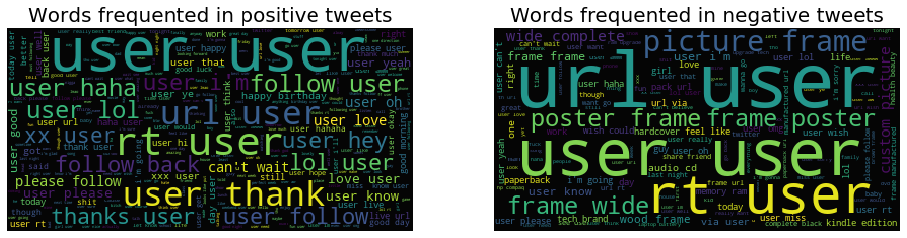

In [4]:
plt.figure(figsize=(16, 4))

wc = WordCloud(background_color="black", max_words=20000, stopwords=eng_stopwords)
wc.generate(' '.join(train_pos))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Words frequented in positive tweets', fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)

wc = WordCloud(background_color="black", max_words=20000, stopwords=eng_stopwords)
wc.generate(' '.join(train_neg))
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Words frequented in negative tweets', fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

Text(0.5, 1.0, 'No of words per tweet - negative samples')

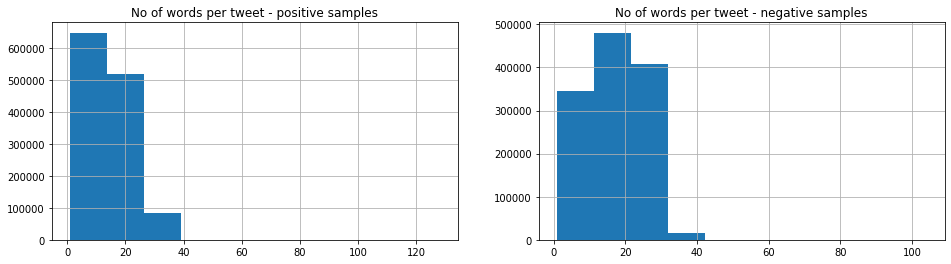

In [5]:
plt.figure(figsize=(16, 4))

pos_n_words = list(map(lambda x: len(str(x).split()), train_pos))
neg_n_words = list(map(lambda x: len(str(x).split()), train_neg))

plt.subplot(1, 2, 1)
plt.hist(pos_n_words)
plt.grid()
plt.title('No of words per tweet - positive samples')

plt.subplot(1, 2, 2)
plt.hist(neg_n_words)
plt.grid()
plt.title('No of words per tweet - negative samples')

Text(0.5, 1.0, 'No of unique words per tweet - negative samples')

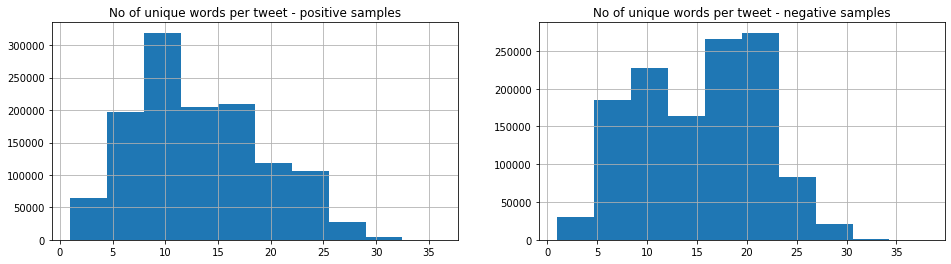

In [6]:
plt.figure(figsize=(16, 4))

pos_n_words = list(map(lambda x: len(set(str(x).split())), train_pos))
neg_n_words = list(map(lambda x: len(set(str(x).split())), train_neg))

plt.subplot(1, 2, 1)
plt.hist(pos_n_words)
plt.grid()
plt.title('No of unique words per tweet - positive samples')

plt.subplot(1, 2, 2)
plt.hist(neg_n_words)
plt.grid()
plt.title('No of unique words per tweet - negative samples')

Text(0.5, 1.0, 'No of unique words per tweet - test samples')

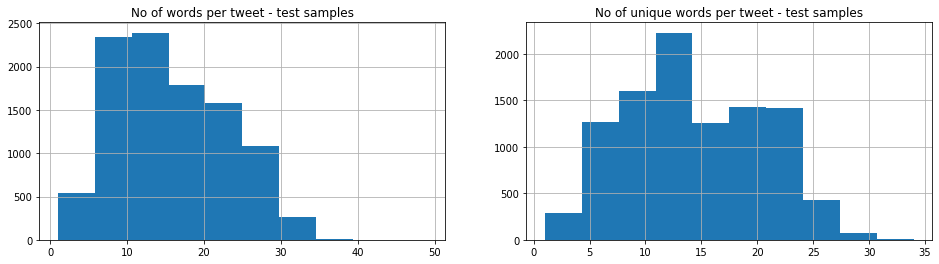

In [7]:
plt.figure(figsize=(16, 4))

test_n_words = list(map(lambda x: len(str(x).split()), test))
plt.subplot(1, 2, 1)
plt.hist(test_n_words)
plt.grid()
plt.title('No of words per tweet - test samples')

test_n_words = list(map(lambda x: len(set(str(x).split())), test))
plt.subplot(1, 2, 2)
plt.hist(test_n_words)
plt.grid()
plt.title('No of unique words per tweet - test samples')

Text(0.5, 1.0, 'No of sentences per tweet - negative samples')

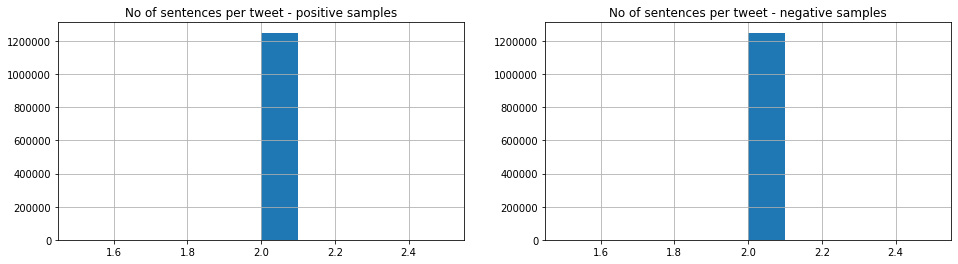

In [8]:
plt.figure(figsize=(16, 4))

pos_n_words = list(map(lambda x: len(re.findall('\n',str(x)))+1, train_pos))
neg_n_words = list(map(lambda x: len(re.findall('\n',str(x)))+1, train_neg))

plt.subplot(1, 2, 1)
plt.hist(pos_n_words)
plt.grid()
plt.title('No of sentences per tweet - positive samples')

plt.subplot(1, 2, 2)
plt.hist(neg_n_words)
plt.grid()
plt.title('No of sentences per tweet - negative samples')

Text(0.5, 1.0, 'Punctuation count per tweet - negative samples')

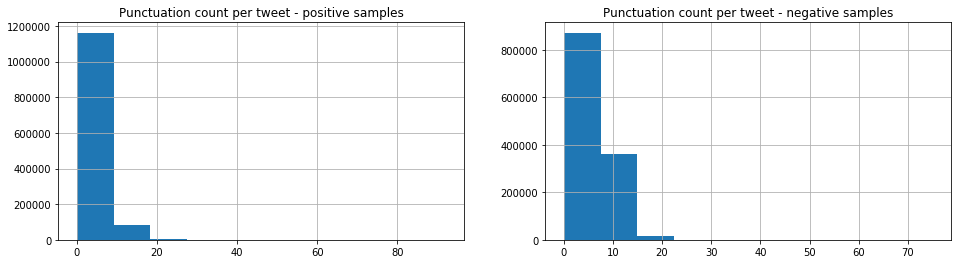

In [9]:
plt.figure(figsize=(16, 4))

pos_n_words = list(map(lambda x: len([c for c in str(x) if c in string.punctuation]), train_pos))
neg_n_words = list(map(lambda x: len([c for c in str(x) if c in string.punctuation]), train_neg))

plt.subplot(1, 2, 1)
plt.hist(pos_n_words)
plt.grid()
plt.title('Punctuation count per tweet - positive samples')

plt.subplot(1, 2, 2)
plt.hist(neg_n_words)
plt.grid()
plt.title('Punctuation count per tweet - negative samples')

Text(0.5, 1.0, 'Punctuation count per tweet - test samples')

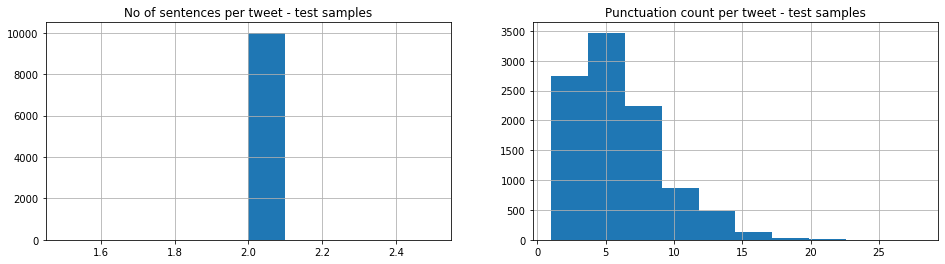

In [10]:
plt.figure(figsize=(16, 4))

test_n_words = list(map(lambda x: len(re.findall('\n',str(x)))+1, test))
plt.subplot(1, 2, 1)
plt.hist(test_n_words)
plt.grid()
plt.title('No of sentences per tweet - test samples')

test_n_words = list(map(lambda x: len([c for c in str(x) if c in string.punctuation]), test))
plt.subplot(1, 2, 2)
plt.hist(test_n_words)
plt.grid()
plt.title('Punctuation count per tweet - test samples')

Text(0.5, 1.0, 'Stopword count per tweet - negative samples')

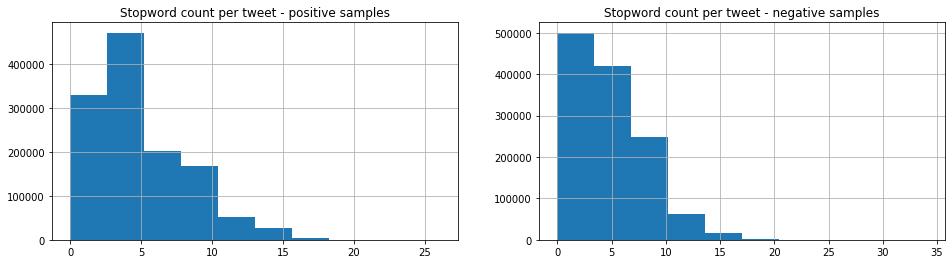

In [11]:
plt.figure(figsize=(16, 4))

pos_n_words = list(map(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]), train_pos))
neg_n_words = list(map(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]), train_neg))

plt.subplot(1, 2, 1)
plt.hist(pos_n_words)
plt.grid()
plt.title('Stopword count per tweet - positive samples')

plt.subplot(1, 2, 2)
plt.hist(neg_n_words)
plt.grid()
plt.title('Stopword count per tweet - negative samples')

Text(0.5, 1.0, 'Stopword count per tweet - test samples')

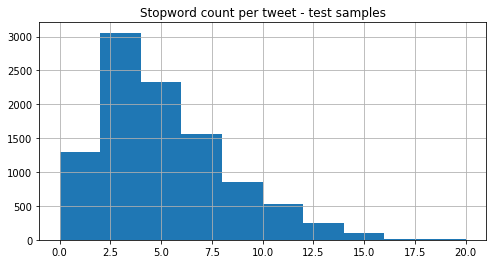

In [12]:
plt.figure(figsize=(8, 4))

test_n_words = list(map(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]), test))
plt.hist(test_n_words)
plt.grid()
plt.title('Stopword count per tweet - test samples')